#📆 dates

[date_1](#d1)
- [get overall pass/fail scores](#d1_all)
- [get pass/fail scores by division](#d1_scoresbydiv)
- [look at failing scores by collection](#d1_scoresbycoll)
- [look at failing scores within a collection](#d1_scoresincoll)

[date_2](#d2)
- [get overall pass/fail scores](#d2_all)
- [get pass/fail scores by division](#d2_scoresbydiv)
- [look at failing scores by collection](#d2_scoresbycoll)
- [look at failing scores within a collection](#d2_scoresincoll)
- [plotting](#d2_plot)

[date_3](#d3)
- [get overall pass/fail scores](#d3_all)
- [get pass/fail scores by division](#d3_scoresbydiv)
- [look at failing scores by collection](#d3_scoresbycoll)
- [look at failing scores within a collection](#d3_scoresincoll)

[date_4](#d4)
- [get overall pass/fail scores](#d4_all)
- [get pass/fail scores by division](#d4_scoresbydiv)
- [look at failing scores by collection](#d4_scoresbycoll)
- [look at failing scores within a collection](#d4_scoresincoll)

[co-occurrences](#co)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('min-mandatory-score_2016-07-08.csv')

In [2]:
# testing 1-2-1-2
df.info()

In [30]:
# check that basic completeness scores look OK
df[['title_1','typeOfResource', 'identifier', 'date_1', 'genre_1', 'location_1']].describe()

In [2]:
# look at all the date scores
df.date.value_counts()

0.00    387040
1.00    324384
0.75    235456
0.50     17734
0.25       452
dtype: int64

##date_1<a id="d1"></a>
####assertion: presence of at least one date element
- [get overall pass/fail scores](#d1_all)
- [get pass/fail scores by division](#d1_scoresbydiv)
- [look at failing scores by collection](#d1_scoresbycoll)
- [look at failing scores within a collection](#d1_scoresincoll)

####get overall pass/fail scores<a id="d1_all"></a>

In [32]:
# record has at least one value in the date field
df.date_1.value_counts()

1    577636
0    387430
dtype: int64

####look at failing scores by division<a id="d1_scoresbydiv"></a>

In [33]:
# see date_1 pass/fail by division
date1_table = pd.pivot_table(df,index=['division'],columns=['date_1'], aggfunc={'date_1':len},fill_value=0)
date1_table

date_1  \
date_1                                                                                                     0   
division                                                                                                       
Art and Picture Collection                                                                              7214   
Billy Rose Theatre Division                                                                            87949   
Carl H. Pforzheimer Collection of Shelley and His Circle                                               14359   
Children's Center at 42nd St                                                                               0   
Dorot Jewish Division                                                                                      3   
Dorothy and Lewis B. Cullman Center for Scholars & Writers                                                 5   
General Research Division                                                                              29553   
George Arents Collection                                                                               98107   
Henry W. and Albert A. Berg Collection of English and American Literature                                759   
Irma and Paul Milstein Division of United States History, Local History and Genealogy                  11304   
Jerome Robbins Dance Division                                                                            823   
Jerome Robbins Dance Division - Audio and Moving Image                                                  3649   
Lionel Pincus and Princess Firyal Map Division                                                          6136   
Manuscripts and Archives Division                                                                      13862   
Music Division                                                                                          9682   
New York Public Library Archives                                                                        1189   
Null                                                                                                      15   
RHA                                                                                                        0   
Rare Book Division                                                                                      3365   
Rodgers and Hammerstein Archives of Recorded Sound                                                        44   
Schomburg Center for Research in Black Culture, Art and Artifacts Division                               890   
Schomburg Center for Research in Black Culture, Jean Blackwell Hutson Research and Reference Division     46   
Schomburg Center for Research in Black Culture, Manuscripts, Archives and Rare Books Division           1685   
Schomburg Center for Research in Black Culture, Moving Image and Recorded Sound Division                   7   
Schomburg Center for Research in Black Culture, Photographs and Prints Division                         1130   
Schomburg General Research and Reference Division                                                        498   
Science, Industry and Business Library: General Collection                                               536   
Slavic and East European Collections                                                                     426   
Spencer Collection                                                                                       862   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Art & Architecture Collection     835   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection          25945   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection                66552   
Theatre on Film and Tape Archive                                                                           0   
Unknown                                                               

In [34]:
# look at failing date_1 scores by division in descending order
# len = total rows and sum = rows that passed
aggregation = {
    'date_1':{
        'failing_scores1':lambda x:len(x)-sum(x)
    }
}
# create dataframe that groups by division and aggregrate by dictionary
failed_dates = df.groupby('division').agg(aggregation)

# subtract scores from one column to the other
failed_date_1 = failed_dates['date_1']['failing_scores1']
failed_date_1.order(ascending=False)

division
George Arents Collection                                        98107
Billy Rose Theatre Division                                     87949
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection    66552
General Research Division                                       29553
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection    25945
Carl H. Pforzheimer Collection of Shelley and His Circle        14359
Manuscripts and Archives Division                               13862
Irma and Paul Milstein Division of United States History, Local History and Genealogy    11304
Music Division                                                   9682
Art and Picture Collection                                       7214
Lionel Pincus and Princess Firyal Map Division                   6136
Jerome Robbins Dance Division - Audio and Moving Image           3649
Rare Book Division                                               3

####look at failing scores by collection<a id="d1_scoresbycoll"></a>

In [3]:
# look at failing date_1 scores by collection
df[df['date_1'] == 0.0][['mms_id', 'coll_id', 'division']].sort('coll_id').head()

,mms_id,coll_id,division
23,3012464,25776,Lionel Pincus and Princess Firyal Map Division
842464,4910810,25776,Lionel Pincus and Princess Firyal Map Division
884480,4956356,25776,Lionel Pincus and Princess Firyal Map Division
888873,4963251,25776,Lionel Pincus and Princess Firyal Map Division
889896,4966535,25776,Lionel Pincus and Princess Firyal Map Division


####look at failing scores within a collection<a id="d1_scoresincoll"></a>

In [36]:
# look at failing date_1 scores within a collection
fd1 = df[df['date_1'] == 0.0][['mms_id', 'coll_id', 'division']]

# 25780 is the Billy Rose Theatre Collection photograph file
fd1_25780 = fd1[fd1['coll_id'] == 25780][['mms_id','coll_id', 'division']].sort(['mms_id'])

# use .count() for report stats; remove .count() for content 
fd1_25780.count()

mms_id      75143
coll_id     75143
division    75143
dtype: int64

In [37]:
# look at failing date_1 scores within a collection
fd1 = df[df['date_1'] == 0.0][['mms_id', 'coll_id', 'division']]

# 25782 is the Print Collection portrait file
fd1_25782 = fd1[fd1['coll_id'] == 25782][['mms_id','coll_id', 'division']].sort(['mms_id'])

# use .count() for report stats; remove .count() for content
fd1_25782.count()

mms_id      59181
coll_id     59181
division    59181
dtype: int64

##date_2<a id="d2"></a>
####assertion: record has W3CDTF encoded date
- [get overall pass/fail scores](#d2_all)
- [get pass/fail scores by division](#d2_scoresbydiv)
- [look at failing scores by collection](#d2_scoresbycoll)
- [look at failing scores within a collection](#d2_scoresincoll)
- [plotting](#d2_plot)

####get overall pass/fail scores<a id="d2_all"></a>

In [38]:
# record has W3CDTF encoded date
df.date_2.value_counts()

1    508642
0    456424
dtype: int64

####look at failing scores by division<a id="d2_scoresbydiv"></a>

In [39]:
# get total number of records that failed date_2
# the number of records failing date_2 will include those that failed date_1, so we need to
# calculate the difference between records that failed date_2 and date_1
# len = total rows and sum = rows that passed
aggregation = {
    'date_1':{
        'failing_scores1':lambda x:len(x)-sum(x)
        },
    'date_2':{
        'failing_scores2':lambda x:len(x)-sum(x)
    }
}
# create dataframe that groups by division and aggregrate by dictionary
failed_dates = df.groupby('division').agg(aggregation)

# subtract scores from one column to the other
difference = failed_dates['date_2']['failing_scores2']-failed_dates['date_1']['failing_scores1']
difference.sum()

68994

In [40]:
difference.order(ascending=False)

division
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection    15107
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection     7416
Lionel Pincus and Princess Firyal Map Division                   6860
Manuscripts and Archives Division                                5362
Jerome Robbins Dance Division - Audio and Moving Image           4771
Spencer Collection                                               3117
Music Division                                                   2881
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Art & Architecture Collection     2350
Henry W. and Albert A. Berg Collection of English and American Literature     2205
Jerome Robbins Dance Division                                    2178
Slavic and East European Collections                             2120
Art and Picture Collection                                       1894
General Research Division             

####plotting<a id="d2_plot"></a>

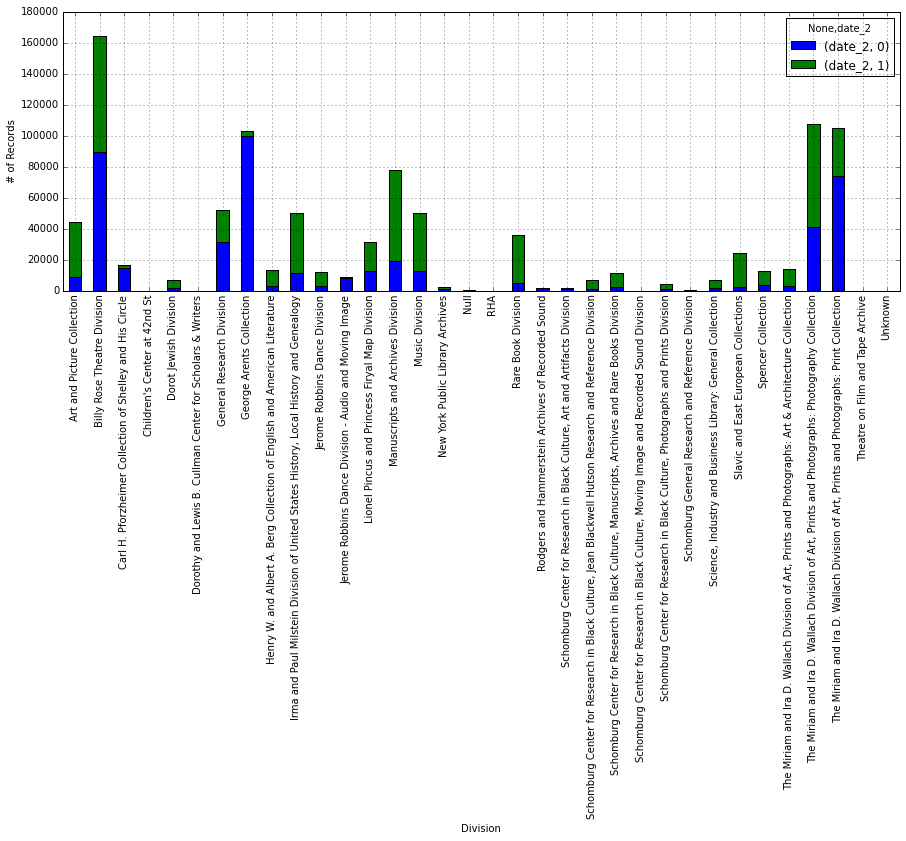

In [41]:
# create a bar chart plotting date_2 score counts by division
date2_table = pd.pivot_table(df,index=['division'],columns=['date_2'], aggfunc={'date_2':len},fill_value=0)
date2scoresplot = date2_table.plot(kind='bar', figsize=(15,5), stacked=True)
date2scoresplot.set_xlabel('Division')
date2scoresplot.set_ylabel('# of Records')

####look at failing scores by collection<a id="d2_scoresbycoll"></a>

In [42]:
# look at failing date_2 scores by collection
# create dataframe that groups by collection and aggregrate by dictionary
failed_dates = df.groupby('coll_id').agg(aggregation)
# subtract scores from one column to the other
difference = failed_dates['date_2']['failing_scores2']-failed_dates['date_1']['failing_scores1']
difference.order(ascending=False)

coll_id
42490      9255
25781      4513
25876      3655
25800      2441
41293      2440
44450      1823
43992      1788
47312      1612
27098      1611
25783      1603
44210      1487
25779      1305
25784      1012
45250       992
25796       936
...
29133      -4
39356      -4
29204      -5
41559      -5
28899      -5
27386      -6
29508      -7
46910      -7
43450      -9
39756     -10
39945     -10
29834     -13
39369     -17
29563     -18
39603     -26
Length: 6284, dtype: int64

####look at failing scores within a collection<a id="d1_scoresincoll"></a>

In [7]:
# look at failing date_2 scores within a collection
fd2 = df[df['date_2'] == 0.0][['mms_id', 'coll_id', 'division']]

# 25782 is the Print Collection portrait file
fd2_25782 = fd2[fd2['coll_id'] == 25782][['mms_id','coll_id', 'division']].sort(['mms_id'])

# use .count() for report stats; remove .count() for data
fd2_25782.count()

mms_id      59758
coll_id     59758
division    59758
dtype: int64

###!write to csv

In [8]:
# let's get all the data out to a csv
date2_by_coll = pd.pivot_table(df,index=['coll_id'],columns=['date_2'],aggfunc={'date_2':len},fill_value=0)
# write to csv
date2_by_coll.to_csv('testtestdiscard.csv')

##date_3<a id="d3"></a>
####assertion: when more than one single date instance is present, there is no more than one instance of each date type.
- [get overall pass/fail scores](#d3_all)
- [get pass/fail scores by division](#d3_scoresbydiv)
- [look at failing scores by collection](#d3_scoresbycoll)
- [look at failing scores within a collection](#d3_scoresincoll)

####get overall pass/fail scores<a id="d3_all"></a>

In [4]:
# when more than one single date instance is present, there is no more than one instance of each date type.
df.date_3.value_counts()

0    551367
1    413699
dtype: int64

####look at failing scores by division<a id="d3_scoresbydiv"></a>

In [5]:
# get total number of records that failed date_3
# the number of records failing date_3 will include those that failed date_1, so we need to 
# calculate the difference between records that failed date_3 and date_1

# len = total rows and sum = rows that passed
aggregation = {
    'date_1':{
        'failing_scores1':lambda x:len(x)-sum(x)
        },
    'date_3':{
        'failing_scores2':lambda x:len(x)-sum(x)
    }
}
# create dataframe that groups by division and aggregrate by dictionary
failed_dates = df.groupby('division').agg(aggregation)
# subtract scores from one column to the other
difference = failed_dates['date_3']['failing_scores2']-failed_dates['date_1']['failing_scores1']
difference.sum()

163937

In [45]:
difference.order(ascending=False)

division
Manuscripts and Archives Division                               33049
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection    21056
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection    13209
Slavic and East European Collections                            11671
Billy Rose Theatre Division                                     10946
Irma and Paul Milstein Division of United States History, Local History and Genealogy    10944
General Research Division                                        9827
Lionel Pincus and Princess Firyal Map Division                   8516
Rare Book Division                                               8036
Art and Picture Collection                                       6184
Music Division                                                   6147
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Art & Architecture Collection     3990
Jerome Robbins Dance Divis

####look at failing scores by collection<a id="d3_scoresbycoll"></a>

In [46]:
# look at failing date_3 scores by collection
# create dataframe that groups by collection and aggregrate by dictionary
failed_dates = df.groupby('coll_id').agg(aggregation)
# subtract scores from one column to the other
difference = failed_dates['date_3']['failing_scores2']-failed_dates['date_1']['failing_scores1']
difference.order(ascending=False)

coll_id
25791      13820
28814       7127
25876       5905
29828       5781
25783       5647
25782       5060
46650       4617
25784       4598
25795       4235
25799       3758
25785       3644
28752       3302
25789       3115
25790       3020
29504       2551
...
29579      0
29580      0
41938      0
29583      0
41937      0
29585      0
29586      0
29587      0
29588      0
29590      0
29592      0
41934      0
41927      0
29595      0
44991      0
Length: 6284, dtype: int64

####look at failing scores within a collection<a id="d3_scoresincoll"></a>

In [6]:
# look at failing date_3 scores within a collection
fd3 = df[df['date_3'] == 0.0][['mms_id', 'coll_id', 'division']]

# 25782 is the Print Collection portrait file
fd3_25782 = fd3[fd3['coll_id'] == 25782][['mms_id','coll_id', 'division']].sort(['mms_id'])

# use .count() for report stats; remove .count() for data
fd3_25782.count()

mms_id      64241
coll_id     64241
division    64241
dtype: int64

##date_4<a id="d4"></a>
####assertion: if multiple date instances are present, none is a range
- get overall pass/fail scores
- get records failing date_4
- look into failing date_4 scores by division
- plot date_4 scores by division
- look into failing date_4 scores by collection

####date_4: get overall pass/fail scores<a id="d4_all"></a>

In [7]:
# if multiple date instances are present, none is a range.
df.date_4.value_counts()

1    539847
0    425219
dtype: int64

####date_4: look at failing scores by division<a id="d4_scoresbydiv"></a>

In [8]:
# get total number of records that failed date_4
# records failing date_4 will include those that failed date_1, so we need to 
# calculate the difference between records that failed date_4 and date_1

# len = total rows and sum = rows that passed
aggregation = {
    'date_1':{
        'failing_scores1':lambda x:len(x)-sum(x)
        },
    'date_4':{
        'failing_scores2':lambda x:len(x)-sum(x)
    }
}
# create dataframe that groups by division and aggregrate by dictionary
failed_dates = df.groupby('division').agg(aggregation)

# subtract scores from one column to the other
difference = failed_dates['date_4']['failing_scores2']-failed_dates['date_1']['failing_scores1']
difference.sum()

37789

In [9]:
difference.order(ascending=False)

division
Billy Rose Theatre Division                                     8981
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection    4878
Manuscripts and Archives Division                               3917
General Research Division                                       3012
Irma and Paul Milstein Division of United States History, Local History and Genealogy    2958
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection    2837
Spencer Collection                                              2017
Lionel Pincus and Princess Firyal Map Division                  1816
Henry W. and Albert A. Berg Collection of English and American Literature    1464
Slavic and East European Collections                            1323
Jerome Robbins Dance Division                                   1142
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Art & Architecture Collection    1090
Science, Industry and Bus

####date_4: look at failing scores by collection<a id="d4_scoresbycoll"></a>

In [10]:
# look at failing date_4 scores by collection
# create dataframe that groups by collection and aggregrate by dictionary
failed_dates = df.groupby('coll_id').agg(aggregation)

# subtract scores from one column to the other
difference = failed_dates['date_4']['failing_scores2']-failed_dates['date_1']['failing_scores1']
difference.order(ascending=False)

coll_id
29127      5219
29828      2930
25801      2567
25812      1712
25816      1559
28752      1204
25830      1087
25876      1027
25783       961
25820       904
29918       825
25850       774
25852       771
25810       765
43992       690
...
39438      0
39439      0
39440      0
39441      0
39442      0
39445      0
39446      0
39449      0
39451      0
39452      0
39453      0
39454      0
39456      0
39457      0
25776      0
Length: 6284, dtype: int64

###!write to csv

In [11]:
# let's get all the data out to a csv
difference.to_csv('date_4-bycoll.csv')

####date_4: look at failing scores within a collection<a id="d4_scoresincoll"></a>

In [5]:
# look at failing date_4 scores within a collection
fd4 = df[df['date_4'] == 0.0][['mms_id', 'coll_id', 'division']]

# 25782 is the Print Collection portrait file
fd4_25782 = fd4[fd4['coll_id'] == 25782][['mms_id','coll_id', 'division']].sort(['mms_id'])

# use .count() for report stats; remove .count() for data
fd4_25782.count()

mms_id      59187
coll_id     59187
division    59187
dtype: int64

###co-occurrences<a id="co"></a>

In [4]:
print 'Records with date absent and identifier present:'
missingdates_with_ids = df[(df.identifier == 1.0) & (df.date == 0.0)]
print len(missingdates_with_ids)

print 'Records with date absent and shelf locator present:'
missingdates_with_loc3 = df[(df.location_3 == 1.0) & (df.date == 0.0)]
print len(missingdates_with_loc3)

print 'Records date & identifier absent but with shelf locator present:' 
missingids_with_loc3 = df[(df.location_3 == 1.0) & (df.identifier == 0.0) & (df.date == 0.0)]
print len(missingids_with_loc3)

Records with date absent and identifier present:
197679
Records with date absent and shelf locator present:
298298
Records date & identifier absent but with shelf locator present:
100920
